# Unsupervised learning with k-means clustering

intro

# 0. Setup

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

# 1. What is unsupervised learning?

### *Insert text - see https://github.com/adicu/AccessibleML/blob/master/4.%20K-means%20clustering%20and%20unsupervised%20learning.ipynb *

# 2. Clustering

etc. etc

# 3. K-means clustering

# 4. K-means clustering example

The following example uses socioeconomic data, by US county, from the USDA's Food Environment Atlas.  The data and documentation are available at https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/.

*Note there is cool data in the other sheets, and this one was the easiest to work with*

In [2]:
socioeconomic_data = pd.read_excel('food_environment_atlas_2015.xls', sheetname = 'SOCIOECONOMIC', 
                                   na_values = '<Null>')

In [3]:
socioeconomic_data.head(3)

,FIPS,State,County,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00
0,1001,AL,Autauga,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,53049.0,11.9,0,17.5,0,1,0.0
1,1003,AL,Baldwin,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,47618.0,13.3,0,20.2,0,1,0.0
2,1005,AL,Barbour,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,33074.0,25.3,1,36.2,1,0,0.0


In [4]:
# There are a few rows with NaN values, so let's remove those
socioeconomic_data = socioeconomic_data.dropna()

K-means clustering uses a distance metric to define how close points are to each other, so to make things easy, we'll work with the numeric, continuous variables in the dataset

In [5]:
# Cluster on numeric data columns
num_data = socioeconomic_data.drop(['FIPS', 'State', 'County', 'PERPOV10', 'PERCHLDPOV10', 'METRO13', 'POPLOSS00'], 
                                   axis = 1)

In [6]:
num_data.describe()

,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,CHILDPOVRATE10
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,78.331377,8.767474,8.294117,1.133170,1.839134,0.064786,15.886565,23.429350,43129.046875,16.770791,24.184598
std,19.871956,14.432009,13.202869,2.467994,7.547919,0.368701,4.183037,3.348842,10731.296436,6.240291,9.056515
min,2.667918,0.000000,0.000000,0.000000,0.000000,0.000000,3.470599,9.111539,20577.000000,3.100000,2.700000
25%,66.994751,0.402592,1.593918,0.269226,0.194928,0.009950,13.126076,21.433091,36125.000000,12.300000,17.400000
50%,85.777693,1.912475,3.284225,0.463080,0.304808,0.022820,15.569146,23.328966,41246.000000,15.900000,23.500000
75%,94.194460,9.789883,8.234666,0.979332,0.624888,0.046389,18.206867,25.102185,47702.750000,20.225000,29.900000
max,99.163180,85.438778,95.744774,43.014686,94.945703,11.330297,43.384714,41.573938,119075.000000,50.100000,61.100000


### Preprocess data

Let's standardize the data because K-means treats the distances of every dimension equally, and we want all variables to be weighted equally.

In [9]:
norm_data = normalize(num_data)

Well that was fast

### Modeling time

K-means clustering involves these general steps:

1. Decide on the number of clusters you want.  (There are more scientific ways to pick the "k" of k-means, but we'll pick an arbitrary number for now.  Generally, you want to go for a number that's manageable to the average human brain.)
2. Apply the clustering algorithm on your data.
3. Examine the resulting clusters and try to interpret them.  As needed, change k so that the clusters make more sense.

#### Get clusters

In [28]:
# Initialize the algorithm and specify the number of clusters you want
kmeans = KMeans(n_clusters = 5, random_state = 0)

In [29]:
# Run K-means on your data
kmeans.fit(norm_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

#### Interpret the clusters

In [30]:
"""These numbers don't really mean anything though, because they're normalized"""
kmeans.cluster_centers_

array([[  1.28411437e-03,   1.99576913e-04,   2.23081052e-04,
          5.07854310e-05,   4.27466654e-05,   2.92442566e-06,
          2.34331520e-04,   4.52277336e-04,   9.99998765e-01,
          2.40883748e-04,   3.34731040e-04],
       [  2.71345773e-03,   7.42570159e-05,   8.18489656e-05,
          9.85448047e-06,   2.58237017e-05,   7.80746122e-07,
          5.48204838e-04,   6.46351151e-04,   9.99995219e-01,
          6.07346123e-04,   9.10112545e-04],
       [  1.53387778e-03,   1.39462523e-03,   1.11452893e-04,
          1.77818843e-05,   1.70751495e-05,   7.70910691e-07,
          4.55769909e-04,   7.37389432e-04,   9.99996048e-01,
          8.25207955e-04,   1.18132898e-03],
       [  2.04581818e-03,   8.88974268e-05,   1.15362844e-04,
          1.56179516e-05,   3.41990600e-05,   1.05863107e-06,
          3.98833085e-04,   5.33331455e-04,   9.99997413e-01,
          3.46176670e-04,   5.01339797e-04],
       [  1.03643232e-03,   7.44243639e-05,   1.33280859e-03,
          2.29

In [31]:
# Add the cluster assignements to the original dataset, so that we can look inside each cluster
num_data['cluster'] = kmeans.labels_

In [32]:
num_data.head()

,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,CHILDPOVRATE10,cluster
0,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,53049.0,11.9,17.5,0
1,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,47618.0,13.3,20.2,3
2,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,33074.0,25.3,36.2,2
3,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,35472.0,20.9,28.6,3
4,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,42906.0,16.5,24.1,3


When we tell the algorithm to give us 5 clusters, what does the algorithm see that separates our data into 5 groups?

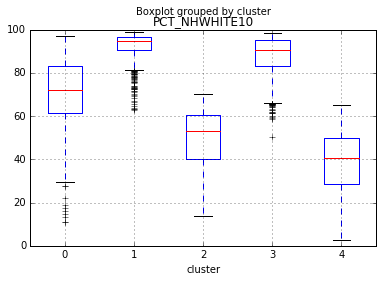

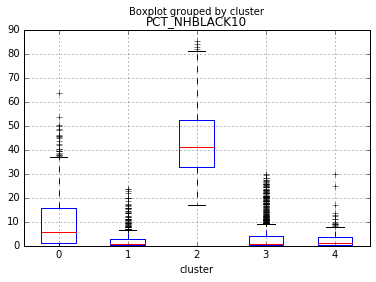

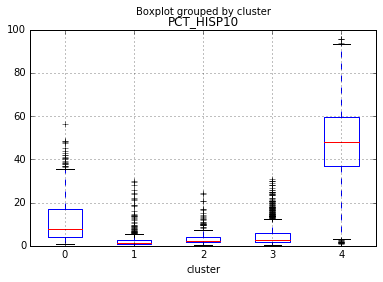

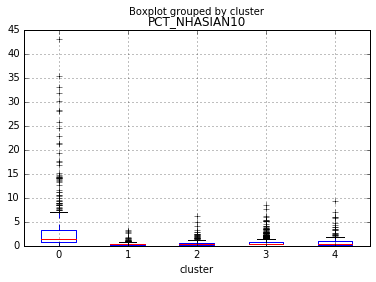

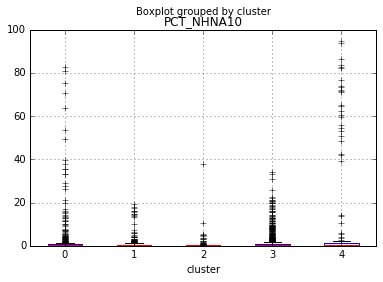

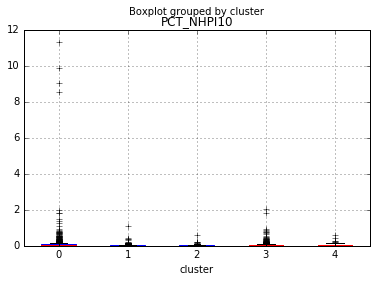

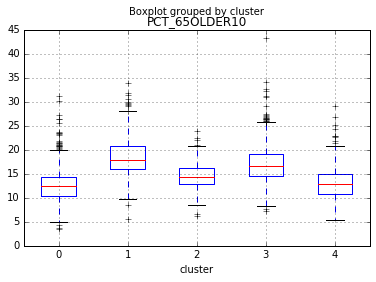

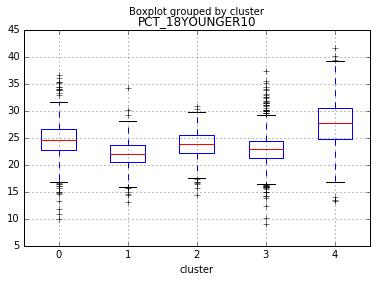

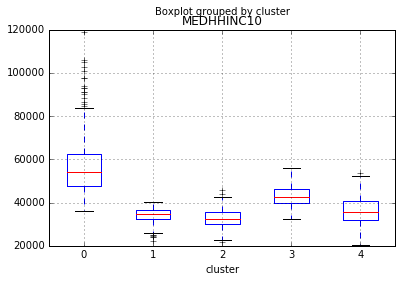

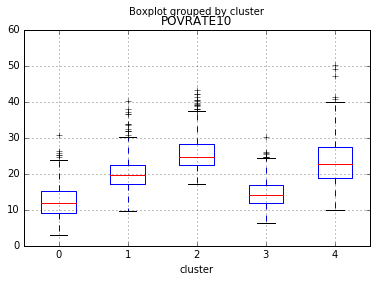

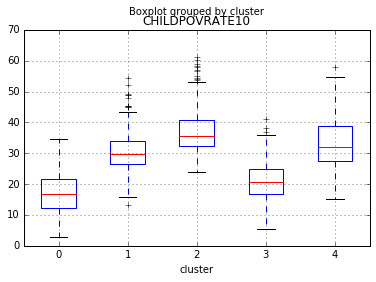

In [33]:
# Let's plot side-by-side boxplots of each feature by cluster number
for col in num_data.columns:
    if col != 'cluster':
        num_data.boxplot(column = col, by = 'cluster')

In [35]:
### How else to interpret the clusters?

### Next steps: Different ways to play around with clustering

- Try with a different number of clusters
- Cluster on a different set of features
- Try a different clustering algorithm (hierarchical, DBSCAN, ... http://scikit-learn.org/stable/modules/clustering.html)

## Other resources

etc.